In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
from scipy.stats import linregress
rcParams['figure.figsize'] = 14,10
plt.style.use('ggplot')

# NY Times Data
us_counties = "covid_data/us-counties.csv"
us_states = "covid_data/us-states.csv"
us_total = "covid_data/us.csv"
counties = pd.read_csv(us_counties)
states = pd.read_csv(us_states)
us = pd.read_csv(us_total)

us

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
173,2020-07-12,3318347,134977
174,2020-07-13,3379859,135402
175,2020-07-14,3445483,136356
176,2020-07-15,3513846,137327


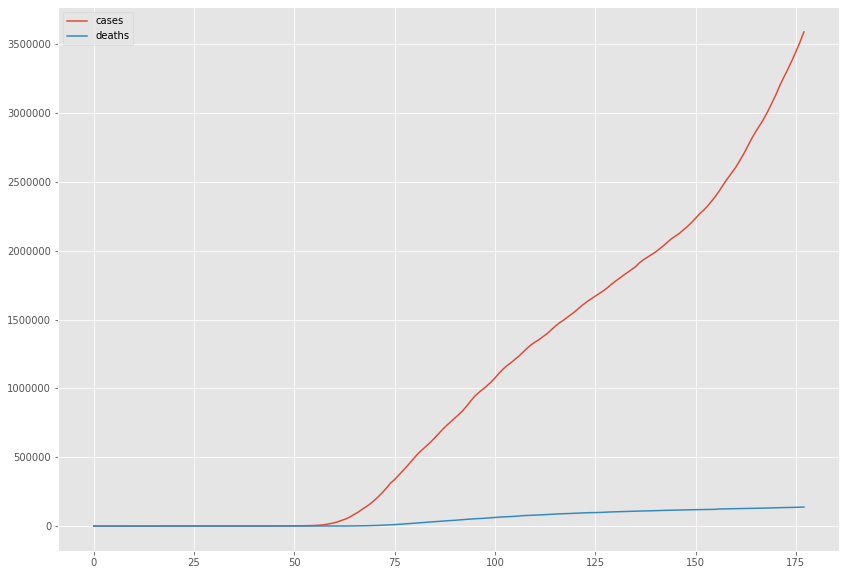

In [2]:
us.plot();
#states[['date','state','cases','deaths']].plot();
#counties.plot();

In [3]:
trump_data = "approval_ratings/trump_ratings.csv"
trump_ratings = pd.read_csv(trump_data)
trump_ratings.head()

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,...,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,7/17/2020,1/20/2017,1/22/2017,Morning Consult,B/C,1992.0,rv,0.680029,...,37.0,45.136218,37.901041,NaN,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,49249,77261,1/23/2017,7/17/2020 9:53
1,Donald Trump,All polls,7/17/2020,1/20/2017,1/22/2017,Gallup,B,1500.0,a,0.262323,...,45.0,45.761409,43.566085,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,7/17/2020 9:53
2,Donald Trump,All polls,7/17/2020,1/20/2017,1/24/2017,Ipsos,B-,1632.0,a,0.153481,...,45.2,43.122312,43.865379,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,7/17/2020 9:53
3,Donald Trump,All polls,7/17/2020,1/21/2017,1/23/2017,Gallup,B,1500.0,a,0.242845,...,46.0,45.761409,44.566085,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,7/17/2020 9:53
4,Donald Trump,All polls,7/17/2020,1/20/2017,1/25/2017,Quinnipiac University,B+,1190.0,rv,1.514172,...,44.0,37.646971,42.745973,NaN,NaN,https://poll.qu.edu/national/release-detail?Re...,49260,77272,1/26/2017,7/17/2020 9:53


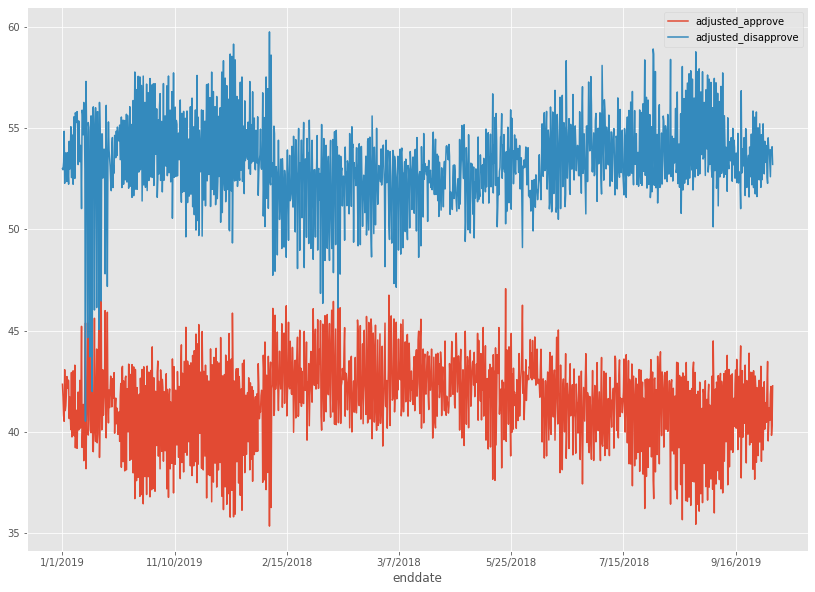

In [4]:
avg_trump_ratings =trump_ratings.groupby('enddate').agg({'adjusted_approve': 'mean', 'adjusted_disapprove': 'mean'})
avg_trump_ratings.plot();
#trump_ratings.plot(kind='line', x='enddate', y='disapprove')

In [5]:
# John's Hopkins Data
jh_data = "covid_data/time_series_covid19_deaths_US.csv"
jh_covid = pd.read_csv(jh_data)
jh_covid.drop(columns=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Lat', 'Long_', 'Combined_Key', 'Population', 'Country_Region'], inplace=True)
jh_covid.head(10)

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20
0,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
2,Northern Mariana Islands,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
3,Puerto Rico,0,0,0,0,0,0,0,0,0,...,159,159,159,167,167,167,169,171,172,177
4,Virgin Islands,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
5,Alabama,0,0,0,0,0,0,0,0,0,...,12,13,14,14,15,15,17,18,19,20
6,Alabama,0,0,0,0,0,0,0,0,0,...,9,10,11,11,11,11,11,12,13,13
7,Alabama,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,3,3,3,3
8,Alabama,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,2,2,2,2
9,Alabama,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [6]:
jh_pivot = pd.pivot_table(jh_covid, index=['Province_State'], aggfunc=np.sum, fill_value=0)
jh_pivot.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/16/20,7/17/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,1230,1265,985,1006,1007,1007,1007,1033,1058,1068
Alaska,0,0,0,0,0,0,0,0,0,0,...,17,17,14,15,16,16,16,17,17,17
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,0,0,0,0,0,0,...,2492,2583,1764,1798,1817,1825,1829,1927,1963,2038
Arkansas,0,0,0,0,0,0,0,0,0,0,...,341,353,279,281,286,287,292,301,305,309
California,0,0,0,0,0,0,0,0,0,0,...,7489,7603,6265,6315,6334,6373,6441,6573,6718,6859
Colorado,0,0,0,0,0,0,0,0,0,0,...,1745,1751,1701,1701,1701,1701,1691,1696,1704,1706
Connecticut,0,0,0,0,0,0,0,0,0,0,...,4389,4396,4326,4335,4335,4335,4338,4338,4343,4348
Delaware,0,0,0,0,0,0,0,0,0,0,...,521,521,510,512,512,512,512,514,515,517


# Analysis of NYT Deaths vs Trump Approval Numbers

In [7]:
# To start we need one dataframe, with Four columns. Date, Total Deaths, Trump Approval Rating and Trump disapproval rating

# We can get the date the deaths by looking at the NYT data.
df_deathapproval = us[['date','deaths']]
df_deathapproval['date_clean'] = pd.to_datetime(df_deathapproval['date'])

In [8]:
# So now we need to get the approval rating and disapproval rating by date
from datetime import datetime
trump_ratings['enddate_clean'] = pd.to_datetime(trump_ratings['enddate'])
trump_ratings_2020 = trump_ratings.loc[trump_ratings['enddate_clean'] >= '01-21-2020'] 

trump_ratings_2020_grouped = trump_ratings_2020.groupby('enddate_clean')

approval = trump_ratings_2020_grouped['adjusted_approve'].mean()
disapproval = trump_ratings_2020_grouped['adjusted_disapprove'].mean()

#trump_ratings[['startdate','enddate','adjusted_approve']].loc[]

In [9]:
approval_df = pd.DataFrame(approval)
disapproval_df = pd.DataFrame(disapproval)

deathapproval_approve = pd.merge(df_deathapproval, approval_df, how = 'left', left_on = 'date_clean', right_on = 'enddate_clean')
df_approvalfinal = pd.merge(deathapproval_approve, disapproval_df, how = 'left', left_on = 'date_clean', right_on = 'enddate_clean')

df_approvalfinal

,date,deaths,date_clean,adjusted_approve,adjusted_disapprove
0,2020-01-21,0,2020-01-21,43.076130,52.930799
1,2020-01-22,0,2020-01-22,41.966678,53.236632
2,2020-01-23,0,2020-01-23,45.602169,49.896615
3,2020-01-24,0,2020-01-24,42.208675,54.169452
4,2020-01-25,0,2020-01-25,41.138551,54.879570
...,...,...,...,...,...
173,2020-07-12,134977,2020-07-12,39.979799,56.477837
174,2020-07-13,135402,2020-07-13,40.762214,55.909417
175,2020-07-14,136356,2020-07-14,40.948665,54.881739
176,2020-07-15,137327,2020-07-15,40.921901,54.965856


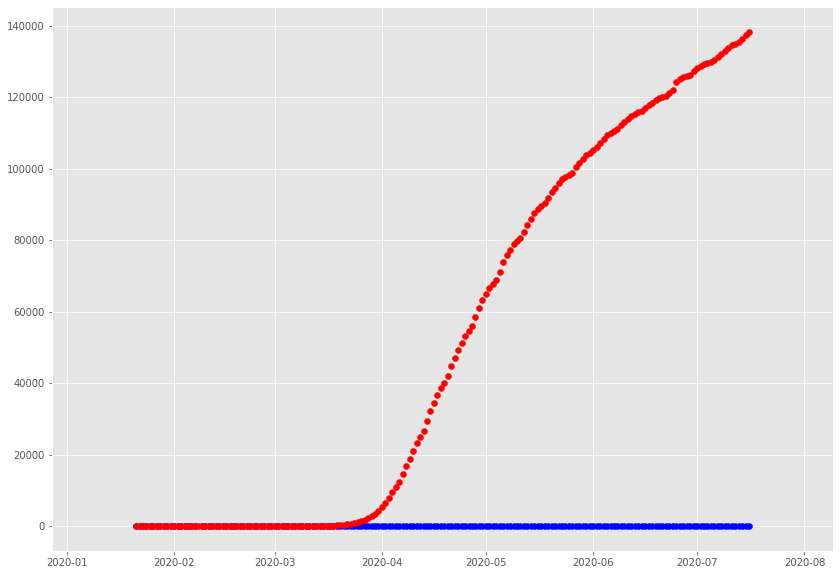

In [10]:
x_data = df_approvalfinal['date_clean']
y_data_approve = df_approvalfinal['adjusted_approve']
y_data_deaths = df_approvalfinal['deaths']

plt.scatter(x = df_approvalfinal['date_clean'], y = df_approvalfinal['adjusted_approve'], c='blue')
plt.scatter(x = df_approvalfinal['date_clean'], y = df_approvalfinal['deaths'], c='red')

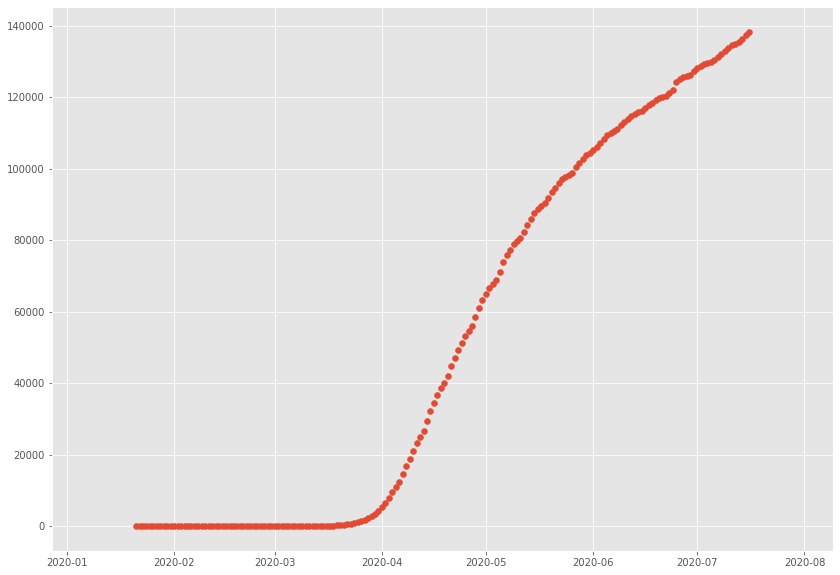

In [11]:
plt.scatter(x = x_data, y = y_data_deaths);

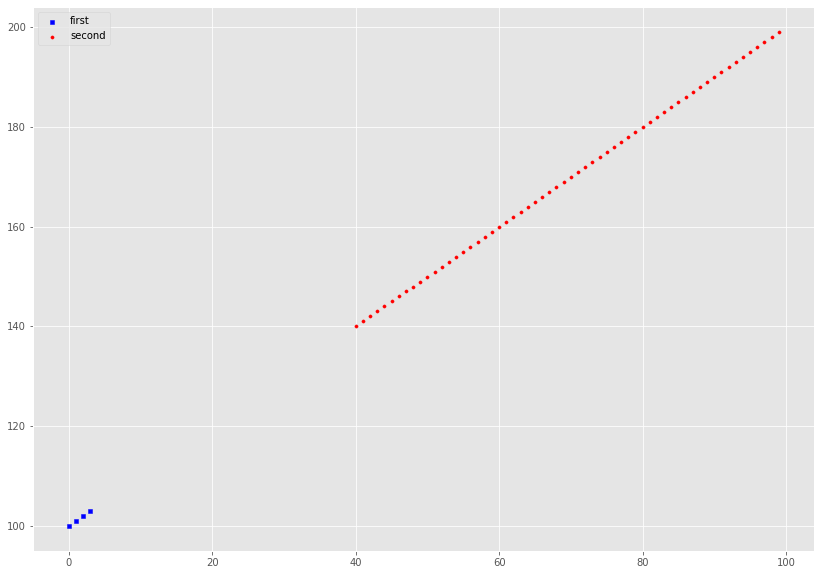

In [12]:
x = range(100)
y = range(100,200)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x[:4], y[:4], s=10, c='b', marker="s", label='first')
ax1.scatter(x[40:],y[40:], s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left');
plt.show()